<a href="https://colab.research.google.com/github/Saimon0007/Clustering-Datasets/blob/main/Clustered_CSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means Cluster**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
url = 'https://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/Processed_CSR.csv'
df = pd.read_csv(url)

X = df.drop(columns=['CSAT Score'])
y = df['CSAT Score']

X_0 = X[y == 4]  # Changed from y == 0 to y == 4
X_1 = X[y == 5]  # Changed from y == 1 to y == 5

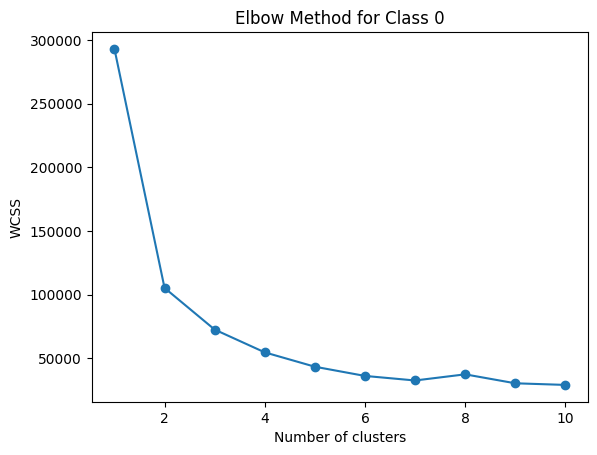

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

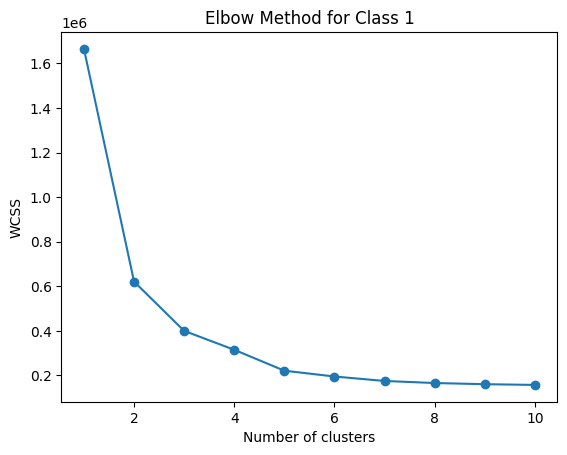

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 3   # <-- set based on elbow visualization
n_clusters_1 = 4   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 4311 samples
Class 0 - Cluster 1: 5101 samples
Class 0 - Cluster 2: 1807 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 15389 samples
Class 1 - Cluster 1: 15246 samples
Class 1 - Cluster 2: 13094 samples
Class 1 - Cluster 3: 15888 samples


In [ ]:
df_0 = X_0.copy()
df_0['CSAT Score'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['CSAT Score'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['CSAT Score'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['CSAT Score', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_CSR_Data.csv', index=False)

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_0 = dbscan_0.fit_predict(X_0)

dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_1 = dbscan_1.fit_predict(X_1)

In [ ]:
unique_0, counts_0 = np.unique(sub_labels_0, return_counts=True)
for cluster, count in zip(unique_0, counts_0):
    print(f"Class 0 - Cluster {cluster}: {count} samples")

Class 0 - Cluster -1: 2202 samples
Class 0 - Cluster 0: 54 samples
Class 0 - Cluster 1: 30 samples
Class 0 - Cluster 2: 40 samples
Class 0 - Cluster 3: 14 samples
Class 0 - Cluster 4: 72 samples
Class 0 - Cluster 5: 17 samples
Class 0 - Cluster 6: 79 samples
Class 0 - Cluster 7: 23 samples
Class 0 - Cluster 8: 49 samples
Class 0 - Cluster 9: 10 samples
Class 0 - Cluster 10: 5 samples
Class 0 - Cluster 11: 14 samples
Class 0 - Cluster 12: 5 samples
Class 0 - Cluster 13: 73 samples
Class 0 - Cluster 14: 18 samples
Class 0 - Cluster 15: 11 samples
Class 0 - Cluster 16: 17 samples
Class 0 - Cluster 17: 11 samples
Class 0 - Cluster 18: 27 samples
Class 0 - Cluster 19: 25 samples
Class 0 - Cluster 20: 18 samples
Class 0 - Cluster 21: 54 samples
Class 0 - Cluster 22: 7 samples
Class 0 - Cluster 23: 47 samples
Class 0 - Cluster 24: 13 samples
Class 0 - Cluster 25: 9 samples
Class 0 - Cluster 26: 67 samples
Class 0 - Cluster 27: 17 samples
Class 0 - Cluster 28: 20 samples
Class 0 - Cluster 29: 

In [ ]:
unique_1, counts_1 = np.unique(sub_labels_1, return_counts=True)
for cluster, count in zip(unique_1, counts_1):
    print(f"Class 1 - Cluster {cluster}: {count} samples")

Class 1 - Cluster -1: 2750 samples
Class 1 - Cluster 0: 97 samples
Class 1 - Cluster 1: 36 samples
Class 1 - Cluster 2: 266 samples
Class 1 - Cluster 3: 151 samples
Class 1 - Cluster 4: 68 samples
Class 1 - Cluster 5: 33 samples
Class 1 - Cluster 6: 282 samples
Class 1 - Cluster 7: 74 samples
Class 1 - Cluster 8: 133 samples
Class 1 - Cluster 9: 320 samples
Class 1 - Cluster 10: 92 samples
Class 1 - Cluster 11: 318 samples
Class 1 - Cluster 12: 52 samples
Class 1 - Cluster 13: 40 samples
Class 1 - Cluster 14: 138 samples
Class 1 - Cluster 15: 166 samples
Class 1 - Cluster 16: 69 samples
Class 1 - Cluster 17: 214 samples
Class 1 - Cluster 18: 29 samples
Class 1 - Cluster 19: 176 samples
Class 1 - Cluster 20: 189 samples
Class 1 - Cluster 21: 67 samples
Class 1 - Cluster 22: 89 samples
Class 1 - Cluster 23: 35 samples
Class 1 - Cluster 24: 128 samples
Class 1 - Cluster 25: 129 samples
Class 1 - Cluster 26: 63 samples
Class 1 - Cluster 27: 63 samples
Class 1 - Cluster 28: 100 samples
Clas

In [ ]:
df_0 = X_0.copy()
df_0['CSAT Score'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['CSAT Score'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['CSAT Score'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['CSAT Score', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_CSR_Data.csv', index=False)

Hierarchical Clustering (also called Agglomerative Clustering)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

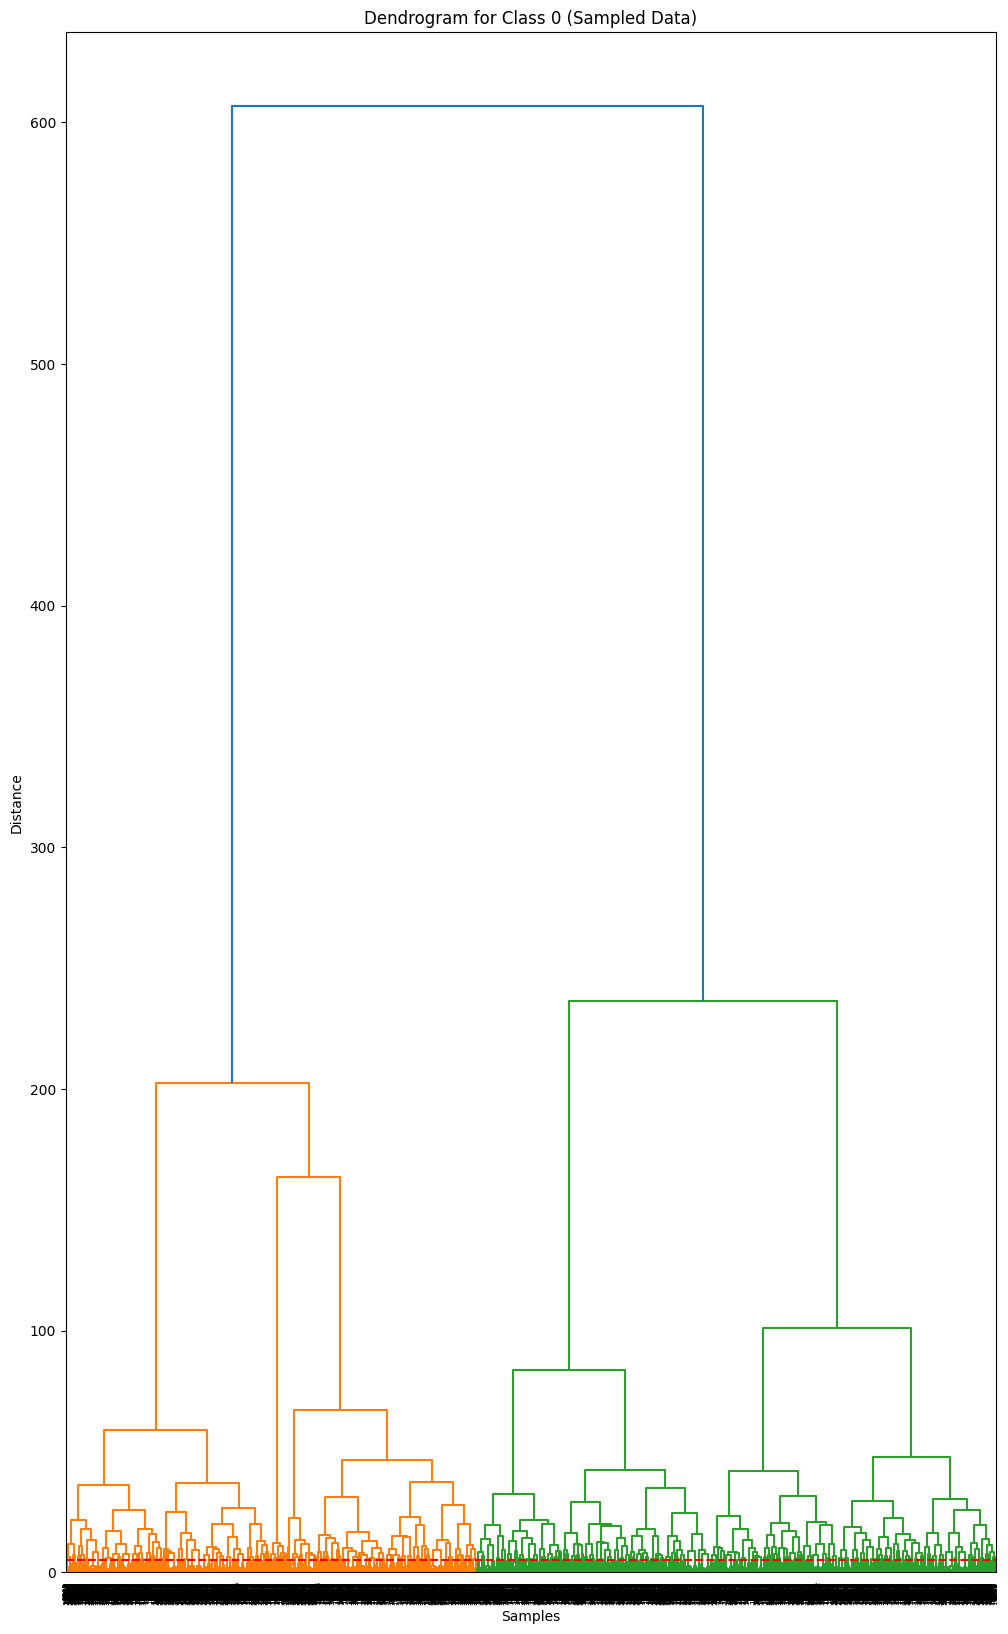

In [ ]:
# Define a sample size for hierarchical clustering to prevent memory issues
sample_size = 30000 # You can adjust this value

# Sample X_0 for hierarchical clustering
X_0_sampled = X_0.sample(min(sample_size, len(X_0)), random_state=42)

# Generate linkage matrix for Class 0 (using sampled data)
Z = linkage(X_0_sampled, method='ward')

plt.figure(figsize=(12, 20))  # Increased figure height for better visibility
dendrogram(Z)
plt.title("Dendrogram for Class 0 (Sampled Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
# Perform hierarchical clustering on the sampled data for Class 0 to avoid memory issues
# Z = linkage(X_0, method='ward') # Original line that caused high memory usage
Z = linkage(X_0_sampled, method='ward')

print("Starting fcluster calculation for Class 0...")
try:
    # Consider adjusting 't'. A very large value like 10000 often results in a single cluster.
    # Based on the dendrogram, a value like 5 (as marked by the red dashed line) might yield more meaningful clusters.
    # cluster_labels = fcluster(Z, t=10000, criterion='distance') # Current large 't' value
    cluster_labels = fcluster(Z, t=5, criterion='distance') # Example of a smaller 't' value

    n_clusters = len(np.unique(cluster_labels))
    print(f"Number of clusters for Class 0 (sampled data): {n_clusters}")
except Exception as e:
    print(f"An error occurred during fcluster calculation for Class 0: {e}")

Starting fcluster calculation for Class 0...
Number of clusters for Class 0 (sampled data): 376


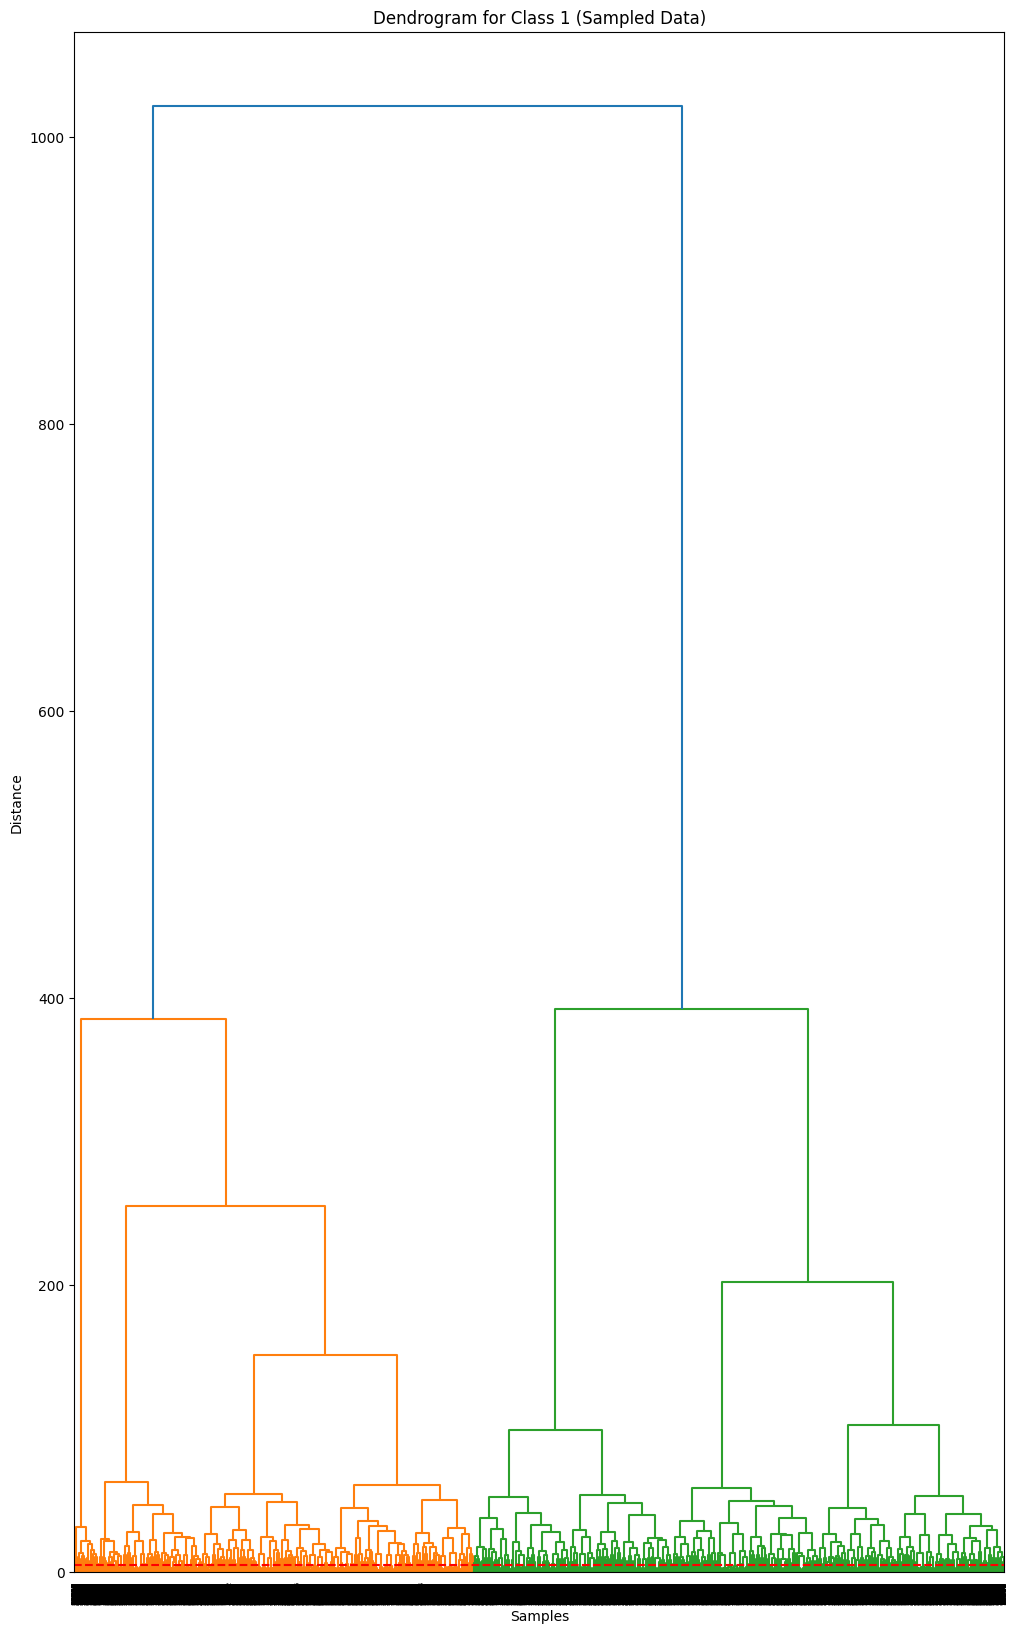

In [ ]:
# Define a sample size for hierarchical clustering to prevent memory issues
sample_size = 30000 # You can adjust this value

# Sample X_1 for hierarchical clustering
X_1_sampled = X_1.sample(min(sample_size, len(X_1)), random_state=42)

# Generate linkage matrix for Class 1 (using sampled data)
Z = linkage(X_1_sampled, method='ward')

plt.figure(figsize=(12, 20))  # Increased figure height for better visibility
dendrogram(Z)
plt.title("Dendrogram for Class 1 (Sampled Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
# Perform hierarchical clustering on the sampled data for Class 1 to avoid memory issues
# Z = linkage(X_1, method='ward') # Original line that caused high memory usage
Z = linkage(X_1_sampled, method='ward')

print("Starting fcluster calculation for Class 1...")
try:
    # Consider adjusting 't'. A very large value like 10000 often results in a single cluster.
    # Based on the dendrogram, a value like 5 (as marked by the red dashed line) might yield more meaningful clusters.
    # cluster_labels = fcluster(Z, t=10000, criterion='distance') # Current large 't' value
    cluster_labels = fcluster(Z, t=5, criterion='distance') # Example of a smaller 't' value

    n_clusters = len(np.unique(cluster_labels))
    print(f"Number of clusters for Class 1 (sampled data): {n_clusters}")
except Exception as e:
    print(f"An error occurred during fcluster calculation for Class 1: {e}")

Starting fcluster calculation for Class 1...
Number of clusters for Class 1 (sampled data): 681


or

In [ ]:
hc_0 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_0 = hc_0.fit_predict(X_0_sampled)

hc_1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_1 = hc_1.fit_predict(X_1_sampled)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 6256 samples
Class 0 - Cluster 1: 4963 samples
Class 1 - Cluster 0: 17111 samples
Class 1 - Cluster 1: 12889 samples


In [ ]:
df_0 = X_0_sampled.copy() # Changed to use X_0_sampled
df_0['CSAT Score'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1_sampled.copy() # Changed to use X_1_sampled
df_1['CSAT Score'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['CSAT Score'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['CSAT Score', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_CSR_Data.csv', index=False)

Spectral Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
def run_spectral_clustering(X_data, class_label, n_neighbors_param):
    best_score = -1
    best_k = None
    best_labels = None

    # Search for the best number of clusters
    for k in range(2, 7):
        sc = SpectralClustering(
            n_clusters=k,
            affinity='rbf',  # or 'rbf'
            n_neighbors=n_neighbors_param, # Changed to use the passed parameter
            assign_labels='kmeans',
            random_state=42
        )
        labels = sc.fit_predict(X_data)
        score = silhouette_score(X_data, labels)
        print(f"Class {class_label} | n_clusters={k}, Silhouette Score={score:.4f}")

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    print(f"Best n_clusters for Class {class_label}: {best_k} (Silhouette Score={best_score:.4f})")
    return best_labels, best_k, best_score

In [ ]:
sub_labels_0, best_k_0, best_score_0 = run_spectral_clustering(X_0, class_label=0, n_neighbors_param=100)
sub_labels_1, best_k_1, best_score_1 = run_spectral_clustering(X_1, class_label=1, n_neighbors_param=100)

KeyboardInterrupt: 

In [ ]:
# Show cluster counts
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

In [ ]:
df_0 = X_0.copy()
df_0['CSAT Score'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['CSAT Score'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['CSAT Score'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['CSAT Score', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_CSR_Data.csv', index=False)

Min Batch k-means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [ ]:
import numpy as np

def cluster_balance_score(counts):
    return counts.std() / counts.mean()  # lower is more even

for k in range(4, 8):  # try 4–7 clusters
    kmeans_0 = MiniBatchKMeans(n_clusters=k, batch_size=256, random_state=42).fit(X_0) # Changed X_class0 to X_0
    kmeans_1 = MiniBatchKMeans(n_clusters=k, batch_size=256, random_state=42).fit(X_1) # Changed X_class1 to X_1

    dist_0 = np.bincount(kmeans_0.labels_)
    dist_1 = np.bincount(kmeans_1.labels_)

    score_0 = cluster_balance_score(dist_0)
    score_1 = cluster_balance_score(dist_1)

    print(f"k={k} | Class0 evenness: {score_0:.3f} | Class1 evenness: {score_1:.3f}")

k=4 | Class0 evenness: 0.206 | Class1 evenness: 0.530
k=5 | Class0 evenness: 0.189 | Class1 evenness: 0.442
k=6 | Class0 evenness: 0.457 | Class1 evenness: 0.429
k=7 | Class0 evenness: 0.424 | Class1 evenness: 0.397


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

# Separate samples by class (using X_0 and X_1 which are already filtered for CSAT Score 4 and 5)
# X_class0 = X[y == 0] # Incorrect filtering
# X_class1 = X[y == 1] # Incorrect filtering

# Define number of clusters (try 4–6 for balance)
n_clusters = 5  # You can adjust this if needed

# Run MiniBatch K-Means
kmeans_0 = MiniBatchKMeans(n_clusters=n_clusters, batch_size=256, random_state=42)
kmeans_1 = MiniBatchKMeans(n_clusters=n_clusters, batch_size=256, random_state=42)

labels_0 = kmeans_0.fit_predict(X_0) # Use X_0 instead of X_class0
labels_1 = kmeans_1.fit_predict(X_1) # Use X_1 instead of X_class1

# Create cluster distributions
dist_0 = pd.Series(labels_0).value_counts().sort_index()
dist_1 = pd.Series(labels_1).value_counts().sort_index()

# Show results
print("Class 0 cluster distribution:")
print(dist_0)
print("\nClass 1 cluster distribution:")
print(dist_1)

# Combine for comparison
dist_df = pd.DataFrame({
    "Class 0": dist_0,
    "Class 1": dist_1
}).fillna(0).astype(int)

print("\nBalanced Cluster Comparison:")
print(dist_df)

Class 0 cluster distribution:
0    1807
1    2364
2    2036
3    1999
4    3013
Name: count, dtype: int64

Class 1 cluster distribution:
0    11923
1     1745
2    15362
3    15888
4    14699
Name: count, dtype: int64

Balanced Cluster Comparison:
   Class 0  Class 1
0     1807    11923
1     2364     1745
2     2036    15362
3     1999    15888
4     3013    14699


In [ ]:
df_0 = X_0.copy()
df_0['CSAT Score'] = 0 # Internal identifier for the 'class 0' group
df_0['Cluster_Label'] = labels_0 # Use labels from MiniBatchKMeans

df_1 = X_1.copy()
df_1['CSAT Score'] = 1 # Internal identifier for the 'class 1' group
df_1['Cluster_Label'] = labels_1 # Use labels from MiniBatchKMeans

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['CSAT Score'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['CSAT Score', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered_CSR_Data.csv', index=False)